In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they wo
n't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


In [7]:
data = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')

In [8]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [9]:
data.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [10]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [12]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [14]:
data.describe().style.background_gradient()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


 **Visulizing the data**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

**scatter plot: Hours Studied vs Performance Index**

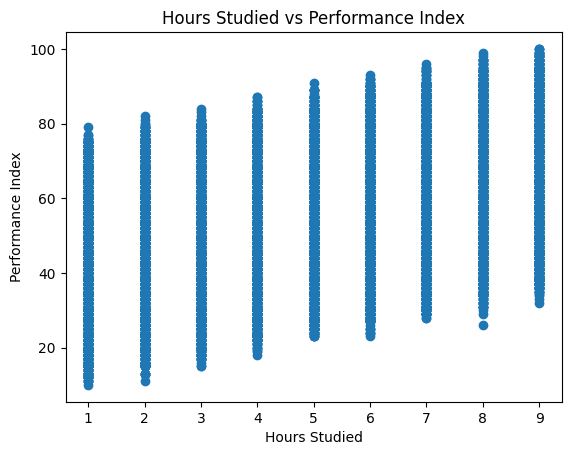

In [17]:
plt.scatter(data['Hours Studied'], data['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Hours Studied vs Performance Index')
plt.show()

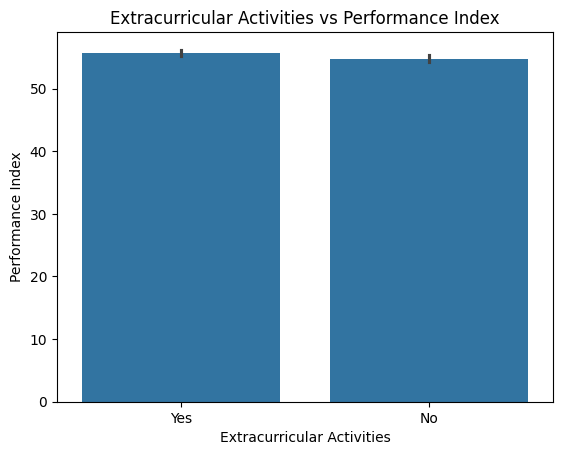

In [21]:
sns.barplot(x = 'Extracurricular Activities', y = 'Performance Index', data = data)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Performance Index')
plt.title('Extracurricular Activities vs Performance Index')
plt.show()

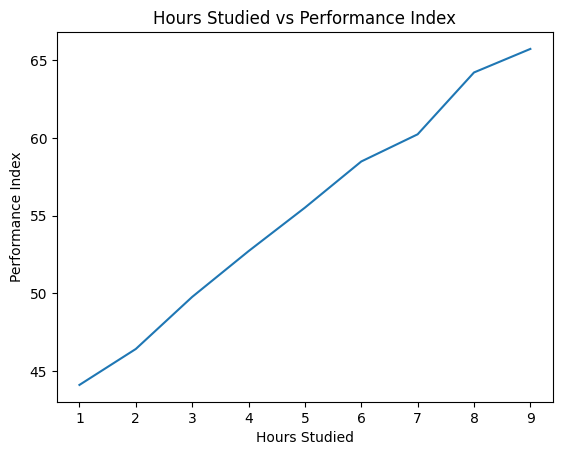

In [23]:
avg = data.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg.index, avg.values)
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Hours Studied vs Performance Index')
plt.show()

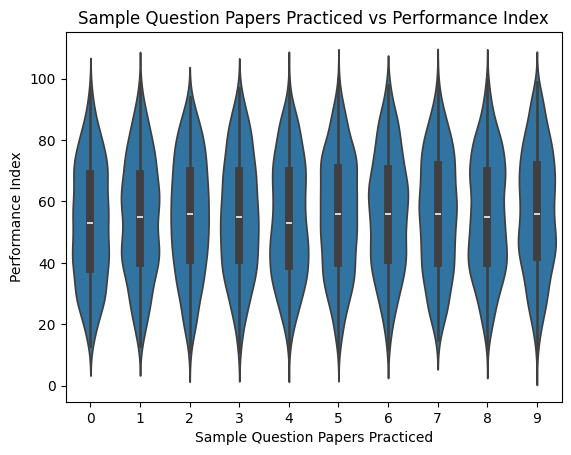

In [28]:
sns.violinplot(x = 'Sample Question Papers Practiced', y = 'Performance Index', data = data)
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.title('Sample Question Papers Practiced vs Performance Index')
plt.show()



/tmp/ipykernel_55/3696437792.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


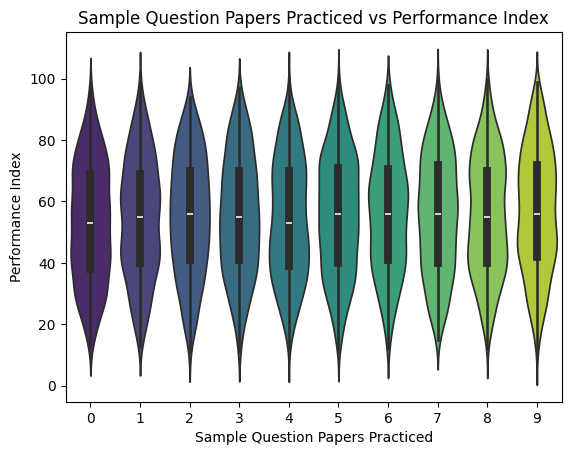

In [27]:
sns.violinplot(
    x='Sample Question Papers Practiced', 
    y='Performance Index', 
    data=data, 
    palette='viridis'  # Add this line
)

plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.title('Sample Question Papers Practiced vs Performance Index')
plt.show()

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

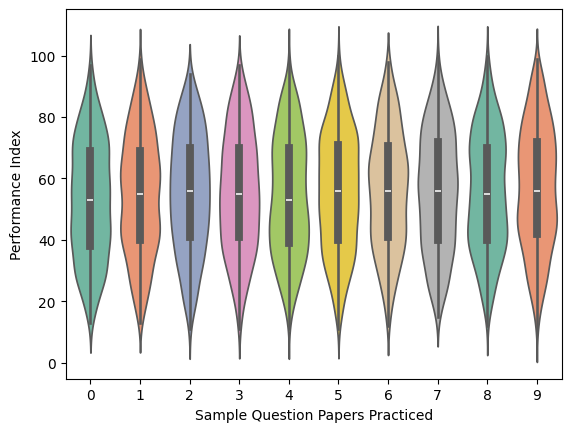

In [29]:
sns.violinplot(
    x='Sample Question Papers Practiced', 
    y='Performance Index', 
    data=data, 
    hue='Sample Question Papers Practiced', # Links color to the x-axis values
    palette='Set2', 
    legend=False                            # Hides the redundant legend
)

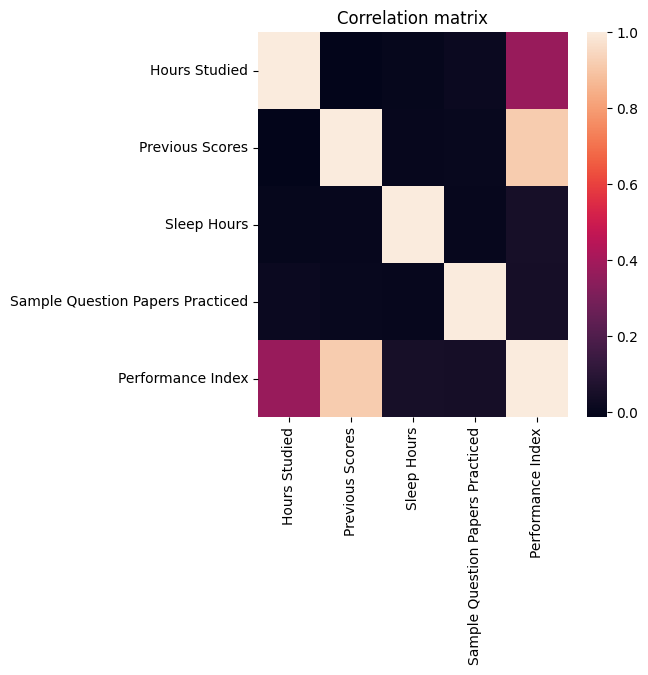

In [38]:
d = data[['Hours Studied','Previous Scores','Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']]

corr = d.corr()
#mask = np.triu(np.ones_like(corr, ))
f,ax = plt.subplots(figsize = (5,5))

sns.heatmap(corr)
plt.title('Correlation matrix')
plt.show()

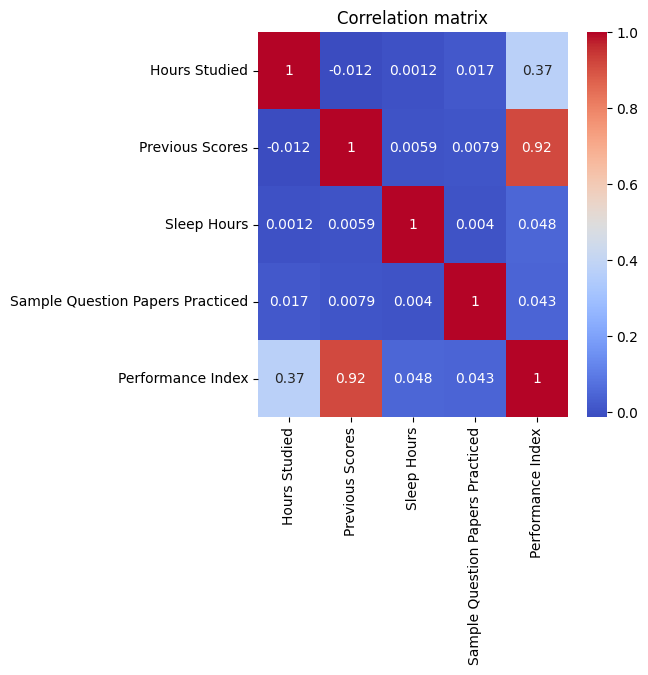

In [39]:
d = data[['Hours Studied','Previous Scores','Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']]

corr = d.corr()
mask = np.triu(np.ones_like(corr, ))
f,ax = plt.subplots(figsize = (5,5))

sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation matrix')
plt.show()

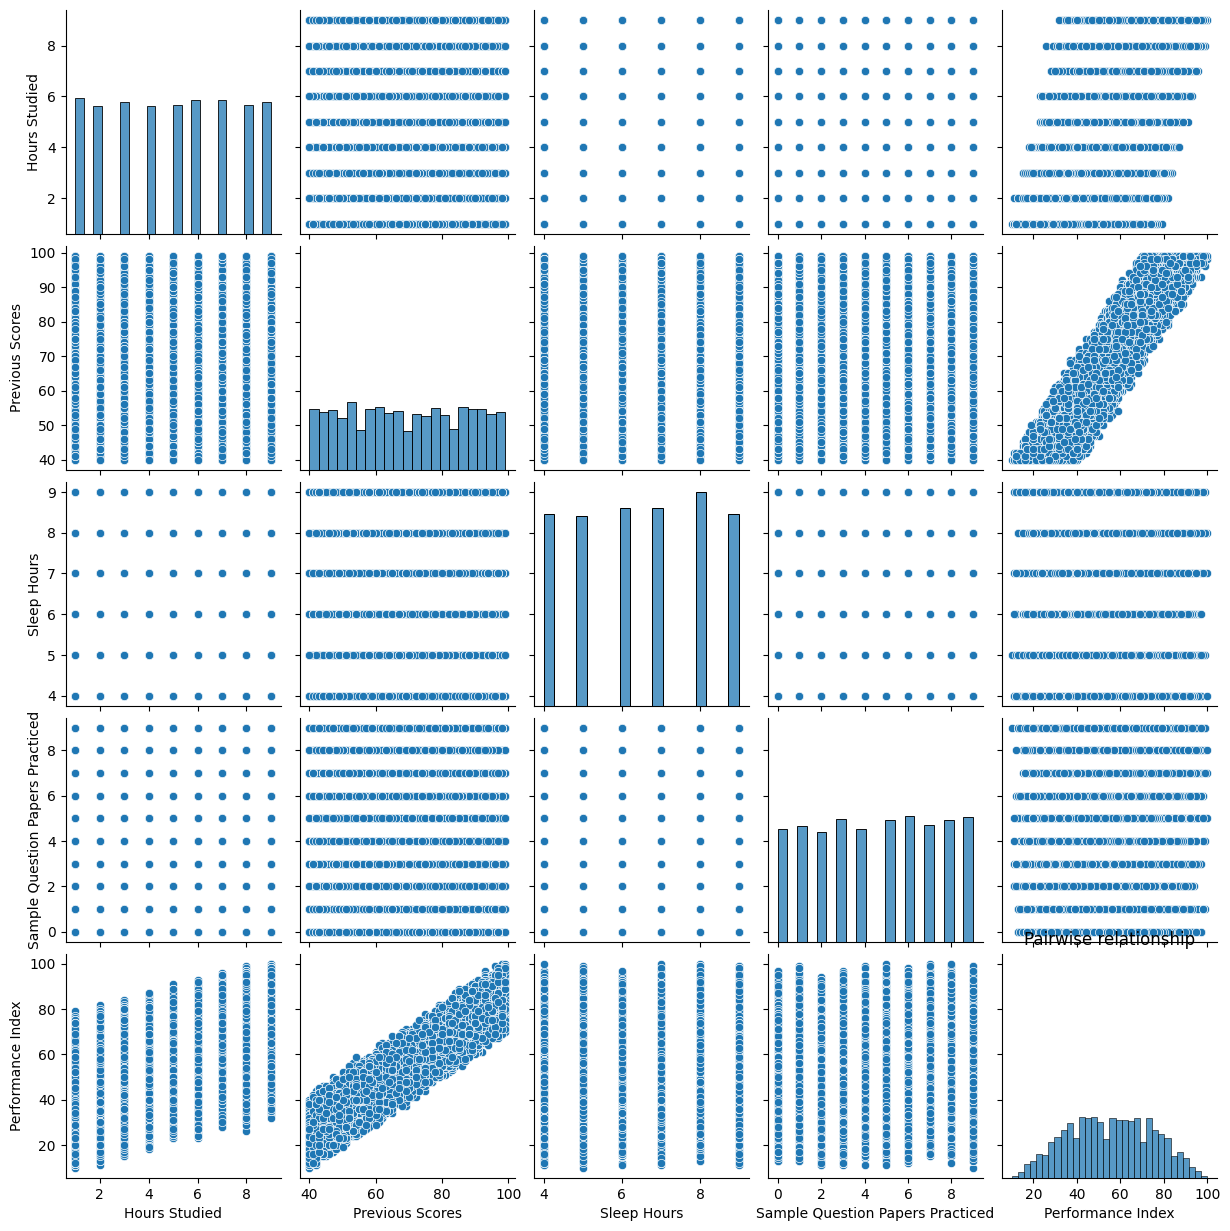

In [40]:
sns.pairplot(data[['Hours Studied','Previous Scores','Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']])
plt.title('Pairwise relationship')
plt.show()